In [24]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import RK45
import matplotlib.pyplot as plt

In [25]:
accuracy = 1e-6
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

In [26]:
def shoot2(psi, x, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[1.0000009871993825, 3.000029194934543, 5.0004023710473104, 7.0033831039650885, 9.019281975386892]
[array([[0.00000000e+00],
       [3.96793572e-01],
       [8.50101396e-01],
       [1.41832079e+00],
       [2.16765381e+00],
       [3.17782025e+00],
       [4.54752940e+00],
       [6.39995939e+00],
       [8.88831175e+00],
       [1.22013574e+01],
       [1.65687530e+01],
       [2.22657746e+01],
       [2.96169925e+01],
       [3.89982986e+01],
       [5.08366135e+01],
       [6.56065487e+01],
       [8.38233053e+01],
       [1.06031164e+02],
       [1.32787075e+02],
       [1.64639102e+02],
       [2.02099805e+02],
       [2.45615073e+02],
       [2.95529372e+02],
       [3.52048896e+02],
       [4.15204588e+02],
       [4.84817397e+02],
       [5.60468479e+02],
       [6.41477115e+02],
       [7.26889075e+02],
       [8.15477780e+02],
       [9.05760023e+02],
       [9.96027200e+02],
       [1.08439196e+03],
       [1.16884902e+03],
       [1.24734789e+03],
       [1.31787379e+03],


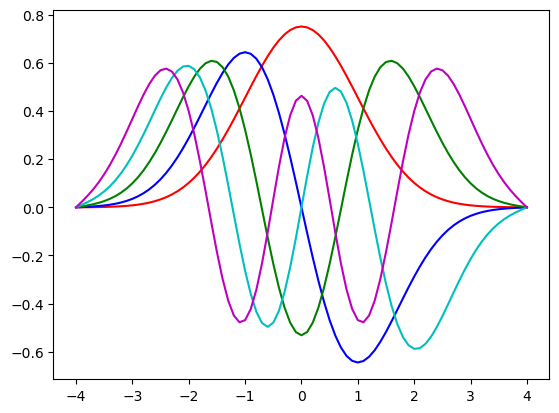

In [27]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [0, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xspan, args=(epsilon,)) 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0]) < accuracy:  
            eigenvalues.append(epsilon)
            eigenfunctions.append(np.vstack(np.abs(y[:,0])))
            break  

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, y[:, 0] / np.sqrt(norm), col[modes-1]) 

A1 = eigenvalues
A2 = eigenfunctions

print(A1)
print(A2)
plt.show()